In [ ]:
# install all the library 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

# In this dataset we find out that how many fraud transction takes place and they can be prevented 
# To also see in which Time frame does most of the fraud transaction takes place also to see that when the card user is most 
# active (i.e mostly makes payment at certain amount of time ).

In [ ]:
# to load the data set of 'credit card.csv'
df=pd.read_csv('/content/drive/MyDrive/Deep Learning(case-study)/creditcard.csv')

In [ ]:
# to see the first 5 vales in the data set 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.drop(['V1','V2','V3','V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],axis=1,inplace=True)

In [ ]:
# to see which are the columns
df.columns

Index(['Time', 'Amount', 'Class'], dtype='object')

In [ ]:
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [ ]:
# check no. of ows and columns
df.shape

(284807, 3)

In [ ]:
# check duplicate values 
df.duplicated().sum()

4857

In [ ]:
# check duplicate values 
df[df.duplicated()]

,Time,Amount,Class
33,26.0,6.14,0
35,26.0,1.77,0
109,73.0,1.00,0
113,74.0,1.18,0
114,74.0,1.18,0
...,...,...,...
284157,172202.0,13.62,0
284191,172233.0,55.66,0
284193,172233.0,36.74,0
284251,172273.0,1.98,0


In [ ]:
# delete duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# see the column class has what records in it 
df['Class'].unique()

array([0, 1])

In [ ]:
# see the col is  is Balanced or not 
df['Class'].value_counts()# the data is un-balanced we have to balanced it 

0    279477
1       473
Name: Class, dtype: int64

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# select input col and output column 
x=df.drop('Class',axis=1) # input column
y=df['Class'] # output column

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [ ]:
# here the value of 1 is much less then the value of 0 so we have to increase the values in 1 .
# so we use Random forest to do so 
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# create an object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)

In [ ]:
x_train1,y_train1=ros.fit_resample(x_train,y_train)

In [ ]:
x_train1.shape,y_train1.shape

((391280, 2), (391280,))

In [ ]:
y_train1.value_counts()

0    195640
1    195640
Name: Class, dtype: int64

In [ ]:
# now balance the output data 
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [ ]:
x_test1.shape,y_test1.shape

((167674, 2), (167674,))

In [ ]:
y_test1.value_counts()

0    83837
1    83837
Name: Class, dtype: int64

In [ ]:
# Apply StandardScaler on the input and output 
from sklearn.preprocessing import StandardScaler

# create object of StandardScaler class
ss=StandardScaler()

# train the data set 
x_train1=ss.fit_transform(x_train1)
x_test1=ss.transform(x_test1)

In [ ]:
# create object of Sequential class
model=tf.keras.Sequential([
    # first hidden layer
    tf.keras.layers.Dense(units=3,activation='relu',input_dim=2),# here 10 means no.of features 
    # input_shape=(x.shape[1]) or input_dim=no. of inputs

    # second hidden layer
    tf.keras.layers.Dense(units=2,activation='relu'),

    # Third Hidden layer
    tf.keras.layers.Dense(units=2,activation='relu'),


    # output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid')

])

In [ ]:
# model summary 
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 3)                 9         
                                                                 
 dense_46 (Dense)            (None, 2)                 8         
                                                                 
 dense_47 (Dense)            (None, 2)                 6         
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model 
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
cb=EarlyStopping(
    monitor='val_loss',
    min_delta = 0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline= None,
    restore_best_weights= False
)

In [ ]:
# train the model 
trained_model1=model.fit(x_train1,y_train1,epochs=5000,callbacks=cb,batch_size=32,validation_data=(x_test1,y_test1))# validation to check testing loss

Epoch 1/5000
12228/12228 [==============================] - 48s 4ms/step - loss: 0.6579 - accuracy: 0.6141 - val_loss: 0.6560 - val_accuracy: 0.6156
Epoch 2/5000
12228/12228 [==============================] - 31s 3ms/step - loss: 0.6223 - accuracy: 0.6623 - val_loss: 0.6542 - val_accuracy: 0.6205
Epoch 3/5000
12228/12228 [==============================] - 38s 3ms/step - loss: 0.6160 - accuracy: 0.6797 - val_loss: 0.6556 - val_accuracy: 0.6257
Epoch 4/5000
12228/12228 [==============================] - 34s 3ms/step - loss: 0.6143 - accuracy: 0.6812 - val_loss: 0.6632 - val_accuracy: 0.6238
Epoch 5/5000
12228/12228 [==============================] - 31s 3ms/step - loss: 0.6128 - accuracy: 0.6825 - val_loss: 0.6566 - val_accuracy: 0.5981
Epoch 6/5000
12228/12228 [==============================] - 32s 3ms/step - loss: 0.6090 - accuracy: 0.6852 - val_loss: 0.6500 - val_accuracy: 0.6281
Epoch 7/5000
12228/12228 [==============================] - 33s 3ms/step - loss: 0.6044 - accuracy: 0.6931

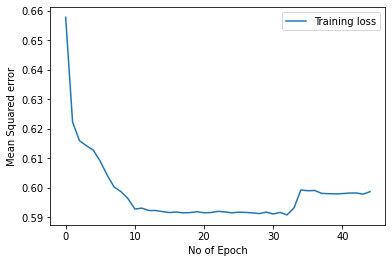

In [ ]:
# visualize the loss and epoch of each iteration 
plt.plot(trained_model1.history['loss'],label="Training loss")
plt.xlabel('No of Epoch')
plt.ylabel('Mean Squared error')
plt.legend()
plt.show()

In [ ]:
# to show weight and bias of each layers
model.get_weights()

[array([[ 2.0299814e+00,  2.1976804e-05,  1.2687777e+00],
        [ 4.3486166e-01, -2.5016546e+00,  5.9261018e-01]], dtype=float32),
 array([-0.22842921, -0.95666283,  0.10779502], dtype=float32),
 array([[  0.19674134,  -7.321522  ],
        [-25.782442  ,   2.5159276 ],
        [ -0.2895262 ,   1.2097942 ]], dtype=float32),
 array([0.34424123, 0.02800219], dtype=float32),
 array([[-1.027985 ,  2.7787564],
        [-0.6140827, -7.604286 ]], dtype=float32),
 array([ 0.        , -0.02545121], dtype=float32),
 array([[-1.2506493],
        [-2.7739823]], dtype=float32),
 array([1.4695643], dtype=float32)]

In [ ]:
# Test the model with 30% data 
y_pred=model.predict(x_test1).round(2)

5240/5240 [==============================] - 12s 2ms/step


In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
# Generate Classification Report and Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.82      0.69     83837
           1       0.70      0.42      0.53     83837

    accuracy                           0.62    167674
   macro avg       0.65      0.62      0.61    167674
weighted avg       0.65      0.62      0.61    167674

[[68852 14985]
 [48221 35616]]


In [ ]:
# create object of Sequential class
from tensorflow.keras import regularizers
model1=tf.keras.Sequential([
    # first hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',input_dim=2,kernel_regularizer=regularizers.l2(0.01)),# here 10 means no.of features 
    # input_shape=(x.shape[1]) or input_dim=no. of inputs

    # second hidden layer
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),

    # Third Hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=regularizers.l2(0.01)),


    # output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))

])

In [ ]:
# complie the model1 
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model 
trained_model2=model1.fit(x_train1,y_train1,epochs=5000,callbacks=cb,batch_size=32,validation_data=(x_test1,y_test1))# validation to check testing loss

Epoch 1/5000
12228/12228 [==============================] - 40s 3ms/step - loss: 0.6991 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5000
12228/12228 [==============================] - 36s 3ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5000
12228/12228 [==============================] - 40s 3ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5000
12228/12228 [==============================] - 39s 3ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5000
12228/12228 [==============================] - 39s 3ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/5000
12228/12228 [==============================] - 34s 3ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/5000
12228/12228 [==============================] - 36s 3ms/step - loss: 0.6932 - accuracy: 0.4988

In [ ]:
# Evaluate the model 
print("Training Loss and Accuracy :",model1.evaluate(x_train1,y_train1))
print("Testing Loss and Accuracy :",model1.evaluate(x_test1,y_test1))

12228/12228 [==============================] - 21s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Training Loss and Accuracy : [0.6932465434074402, 0.5]
5240/5240 [==============================] - 20s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Testing Loss and Accuracy : [0.6932451725006104, 0.5]


In [ ]:
from tensorflow.keras.layers import Dropout
model2=tf.keras.Sequential([
    # first hidden layer
    tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.012),input_dim=2),Dropout(0.20),# here 10 means no.of features 
    # input_shape=(x.shape[1]) or input_dim=no. of inputs, 0.25 is the min value 

    # second hidden layer
    tf.keras.layers.Dense(units=128,activation='relu',kernel_regularizer=regularizers.l2(0.012)),Dropout(0.20),# 0-1

    # Third Hidden layer
    tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.012)),Dropout(0.20),

    # fourth hidden layer 
        tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.012)),Dropout(0.20),

        # fifth hidden layer 
            tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.012)),Dropout(0.25),

            # Sixth hidden layer
                tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=regularizers.l2(0.012)),Dropout(0.25),



    # output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.012))

])

In [ ]:
# complie the model2 
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model2
trained_model=model2.fit(x_train1,y_train1,epochs=5000,callbacks=cb,batch_size=32,validation_data=(x_test1,y_test1))# validation to check testing loss

Epoch 1/5000
12228/12228 [==============================] - 55s 4ms/step - loss: 0.7097 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5000
12228/12228 [==============================] - 57s 5ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5000
12228/12228 [==============================] - 51s 4ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5000
12228/12228 [==============================] - 53s 4ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5000
12228/12228 [==============================] - 55s 4ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/5000
12228/12228 [==============================] - 52s 4ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/5000
12228/12228 [==============================] - 51s 4ms/step - loss: 0.6932 - accuracy: 0.5007

In [ ]:
# Evaluate the model 
print("Training Loss and Accuracy :",model2.evaluate(x_train1,y_train1))
print("Testing Loss and Accuracy :",model2.evaluate(x_test1,y_test1))

12228/12228 [==============================] - 21s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Training Loss and Accuracy : [0.6931308507919312, 0.5]
5240/5240 [==============================] - 9s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Testing Loss and Accuracy : [0.6931191682815552, 0.5]


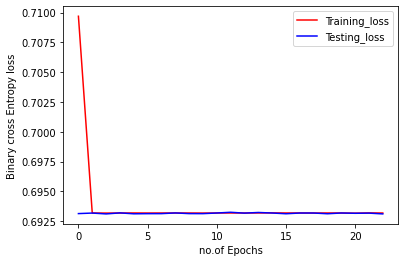

In [ ]:
# visualization for Training and Testing loss 
plt.plot(trained_model.history['loss'],label='Training_loss',color='red')
plt.plot(trained_model.history['val_loss'],label='Testing_loss',color='blue')
plt.legend()
plt.xlabel('no.of Epochs')
plt.ylabel('Binary cross Entropy loss')
plt.show()

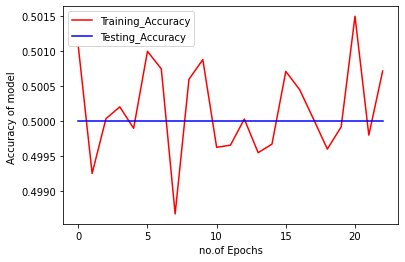

In [ ]:
# visualization for Training and Testing loss 
plt.plot(trained_model.history['accuracy'],label='Training_Accuracy',color='red')
plt.plot(trained_model.history['val_accuracy'],label='Testing_Accuracy',color='blue')
plt.legend()
plt.xlabel('no.of Epochs')
plt.ylabel('Accuracy of model ')
plt.show()# here the accuracyis very good it should always be near 1.

In [ ]:
# Test the model with 20% data 
y_pred=model2.predict(x_test1).round(2)
# Formula for prediction y_pred=1/(np.exp(x_test)) : return the value of probablity each class

5240/5240 [==============================] - 10s 2ms/step


In [ ]:
y_pred=np.where(y_pred>=0.5,1,0)

In [ ]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# Generate Report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     83837
           1       0.50      1.00      0.67     83837

    accuracy                           0.50    167674
   macro avg       0.25      0.50      0.33    167674
weighted avg       0.25      0.50      0.33    167674

[[    0 83837]
 [    0 83837]]


# Conclusion :- 
1) As we can see from the above Score that we have got from this data set is    not accurate .
2). The cause of the data score is less because we have not given the machine enough features for it to train it self was not much .
3). And most importantly the no of records in the Output column was not even i.e(Un-balanced) data in it so we created duplicate values of the existing values which made the data training it self with the same data repeatedly means it did not had much new data for it to train.
4). Which affected on its  result.
5) So the final conclusion is that there should be more data provide to the performer .